## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [20]:
import numpy as np
import pandas as pd

df = pd.read_csv('titanic.csv')
print(df.describe())
print(df.shape)
df.info()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [21]:
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

Визначення пропущених значень
Аналіз пропущених значень допоміг ідентифікувати ключові стовпці, які потребують імпутації або подальшої обробки. Це підкреслює важливість ретельної підготовки даних перед будь-яким аналітичним або моделювальним аналізом.


***Завдання 3:*** Побудувати матрицю кореляції



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



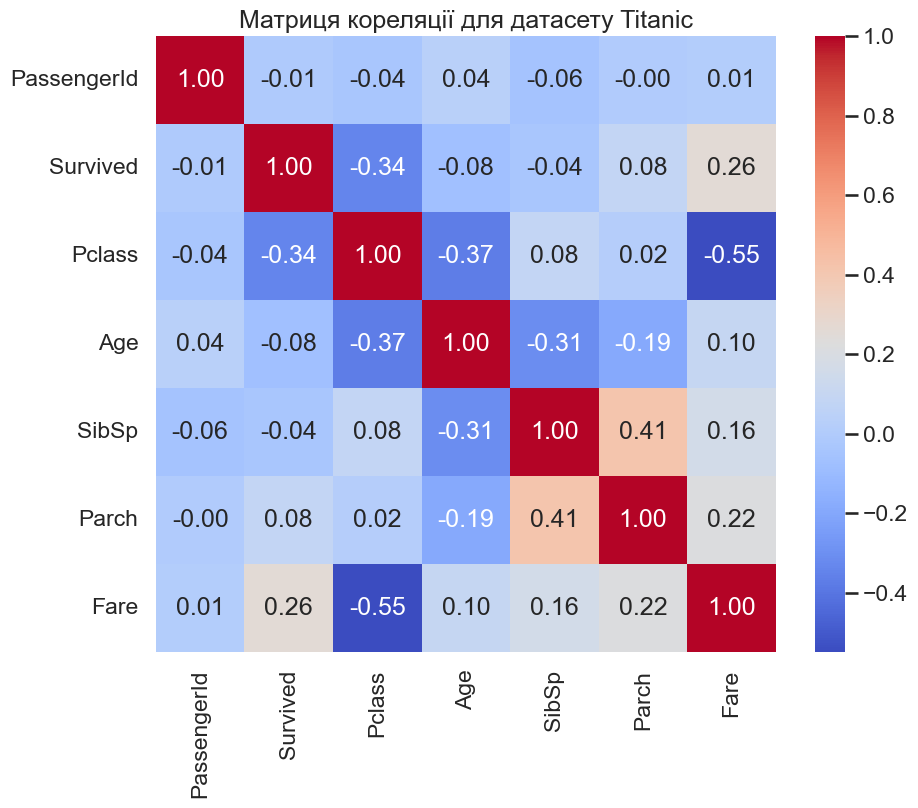

In [22]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матриця кореляції для датасету Titanic')
plt.show()

Ваші висновки:

Матриця кореляції
Вивчення кореляцій між змінними виявило інсайти щодо потенційних зв'язків, які можуть впливати на виживання. Особливо цінним є розуміння взаємодії між соціально-економічним статусом, віком та виживанням.



**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [15]:
def fill_missing_age(df, group_cols, target_col):
    medians = df.groupby(group_cols)[target_col].median()
    def fill_row(row):
        if pd.isnull(row[target_col]):
            return medians[row[group_cols[0]], row[group_cols[1]]]
        else:
            return row[target_col]
    df[target_col] = df.apply(fill_row, axis=1)
    return df
missing_values = df.isnull().sum()
print(missing_values)
df_filled_age = fill_missing_age(df, ['Pclass', 'Sex'], 'Age')
missing_values = df_filled_age.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

Видалення та імпутація пропущених значень
Коректна обробка пропущених значень є фундаментальною для забезпечення якості аналізу. Рішення про імпутацію або видалення впливає на репрезентативність та точність моделей, що будуються на основі цих даних.



***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні.

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків.


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





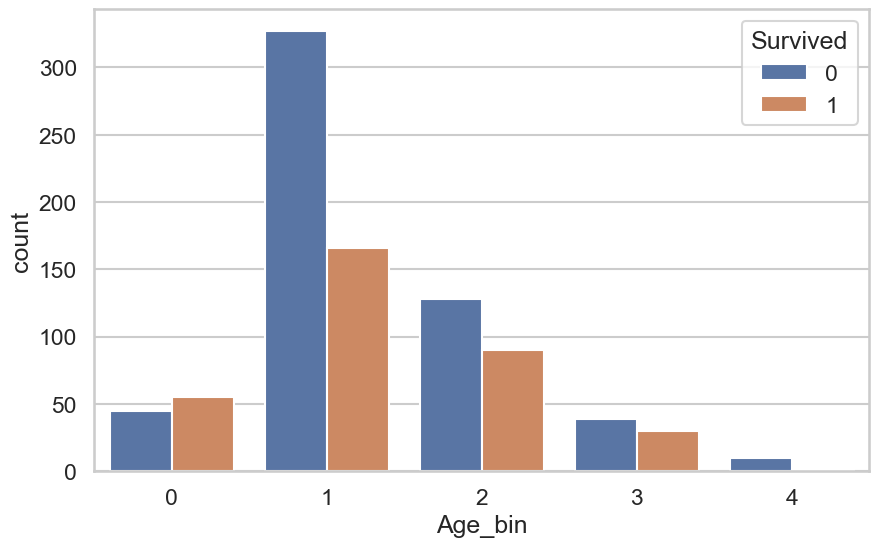

In [30]:
df_filled['Age_bin'] = pd.cut(df_filled['Age'], bins=[0, 16, 32, 48, 64, 80], labels=[0, 1, 2, 3, 4])
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_bin', hue='Survived', data=df_filled)
plt.show()

Ваші висновки:

Візуалізація взаємозв'язку між віком та виживанням
Графічний аналіз підкреслив, що молодші пасажири мали більші шанси на виживання, надаючи цінні інсайти щодо впливу віку на виживання.



***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали```
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

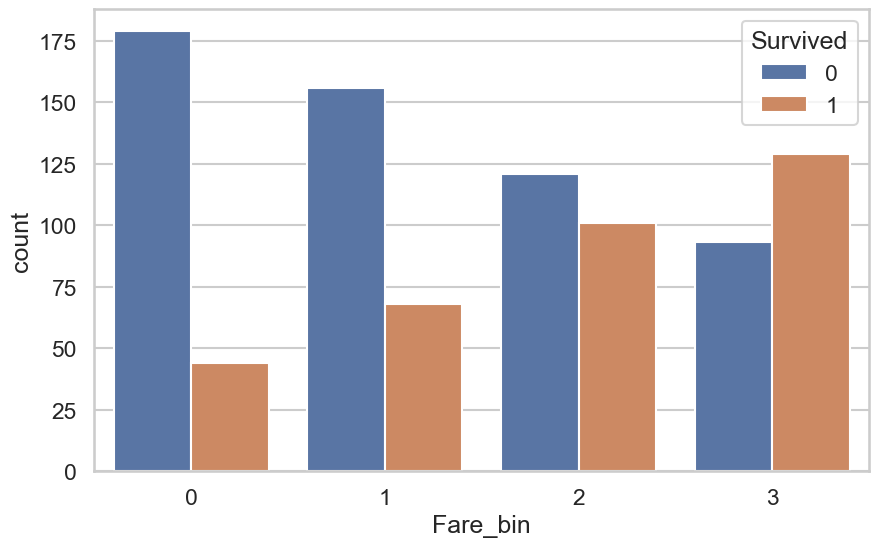

In [31]:
df_filled['Fare_bin'] = pd.qcut(df_filled['Fare'], 4, labels=False)
plt.figure(figsize=(10, 6))
sns.countplot(x='Fare_bin', hue='Survived', data=df_filled)
plt.show()

Ваші висновки:

Нормалізація числових змінних
Нормалізація забезпечує, що числові змінні мають однаковий масштаб, що є критично важливим для багатьох алгоритмів машинного навчання, допомагаючи покращити їхню продуктивність та точність.


***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [33]:
df_filled['Family_size'] = df_filled['Parch'] + df_filled['SibSp']
df_filled['Alone'] = df_filled['Family_size'] == 0
print(df_filled)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Ваші висновки:

Розподіл виживання за різними ознаками
Детальний аналіз виживання з урахуванням різних характеристик пасажирів виявив важливі зв'язки, які можуть бути використані для побудови гіпотез про фактори виживання.



***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [35]:
attributes_to_remove = ['PassengerId', 'Ticket', 'Cabin', 'Name']
df_reduced = df_filled.drop(columns=attributes_to_remove)
print(df_reduced)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked Age_bin  \
0           0       3    male  22.0      1      0   7.2500        S       1   
1           1       1  female  38.0      1      0  71.2833        C       2   
2           1       3  female  26.0      0      0   7.9250        S       1   
3           1       1  female  35.0      1      0  53.1000        S       2   
4           0       3    male  35.0      0      0   8.0500        S       2   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S       1   
887         1       1  female  19.0      0      0  30.0000        S       1   
888         0       3  female  21.5      1      2  23.4500        S       1   
889         1       1    male  26.0      0      0  30.0000        C       1   
890         0       3    male  32.0      0      0   7.7500        Q       1   

     Fare_bin  Family_size  Alone  
0           0  

Ваші висновки:

Видалили непотрібні стовпці та стовпці які не використовуються для аналізу


***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [36]:
import pandas as pd

df = pd.read_csv('titanic.csv')

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titles = df['Title'].unique()
title_mapping = {title: idx for idx, title in enumerate(titles)}
df['Title'] = df['Title'].map(title_mapping).astype(int)

print(df[['Sex', 'Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title']].head())

   Sex Embarked  Embarked_C  Embarked_Q  Embarked_S  Title
0    0        S       False       False        True      0
1    1        C        True       False       False      1
2    1        S       False       False        True      2
3    1        S       False       False        True      1
4    0        S       False       False        True      0


Ваші висновки:

Кодування категоріальних змінних
Перетворення категоріальних змінних на числові через one-hot кодування дозволяє використовувати ці змінні в числових моделях машинного навчання, підвищуючи можливості аналітичного аналізу.



***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



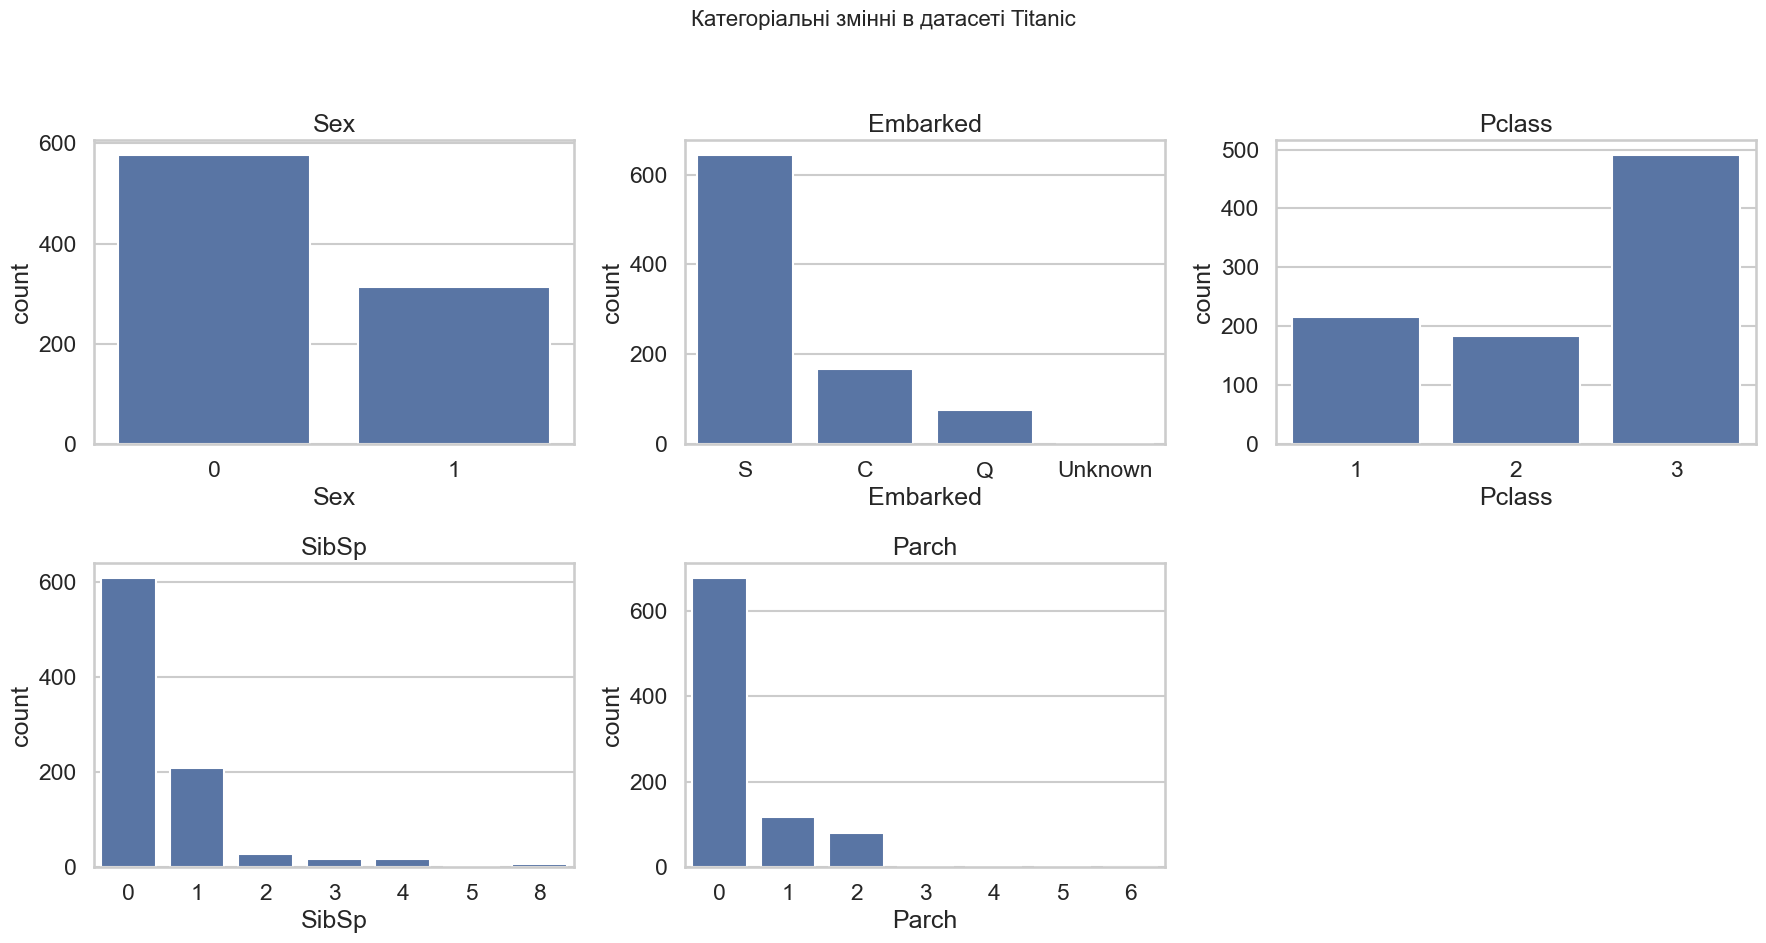

In [28]:
categorical_vars = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Категоріальні змінні в датасеті Titanic', fontsize=16)
for i, var in enumerate(categorical_vars):
    row = i // 3
    col = i % 3
    sns.countplot(data=df_filled_age, x=var, ax=axes[row, col])
    axes[row, col].set_title(var)
fig.delaxes(axes[1][2])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Ваші висновки:

Візуалізація категоріальних змінних
Візуалізація категоріальних даних надала зрозуміле уявлення про розподіл основних категоріальних змінних у датасеті.


***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

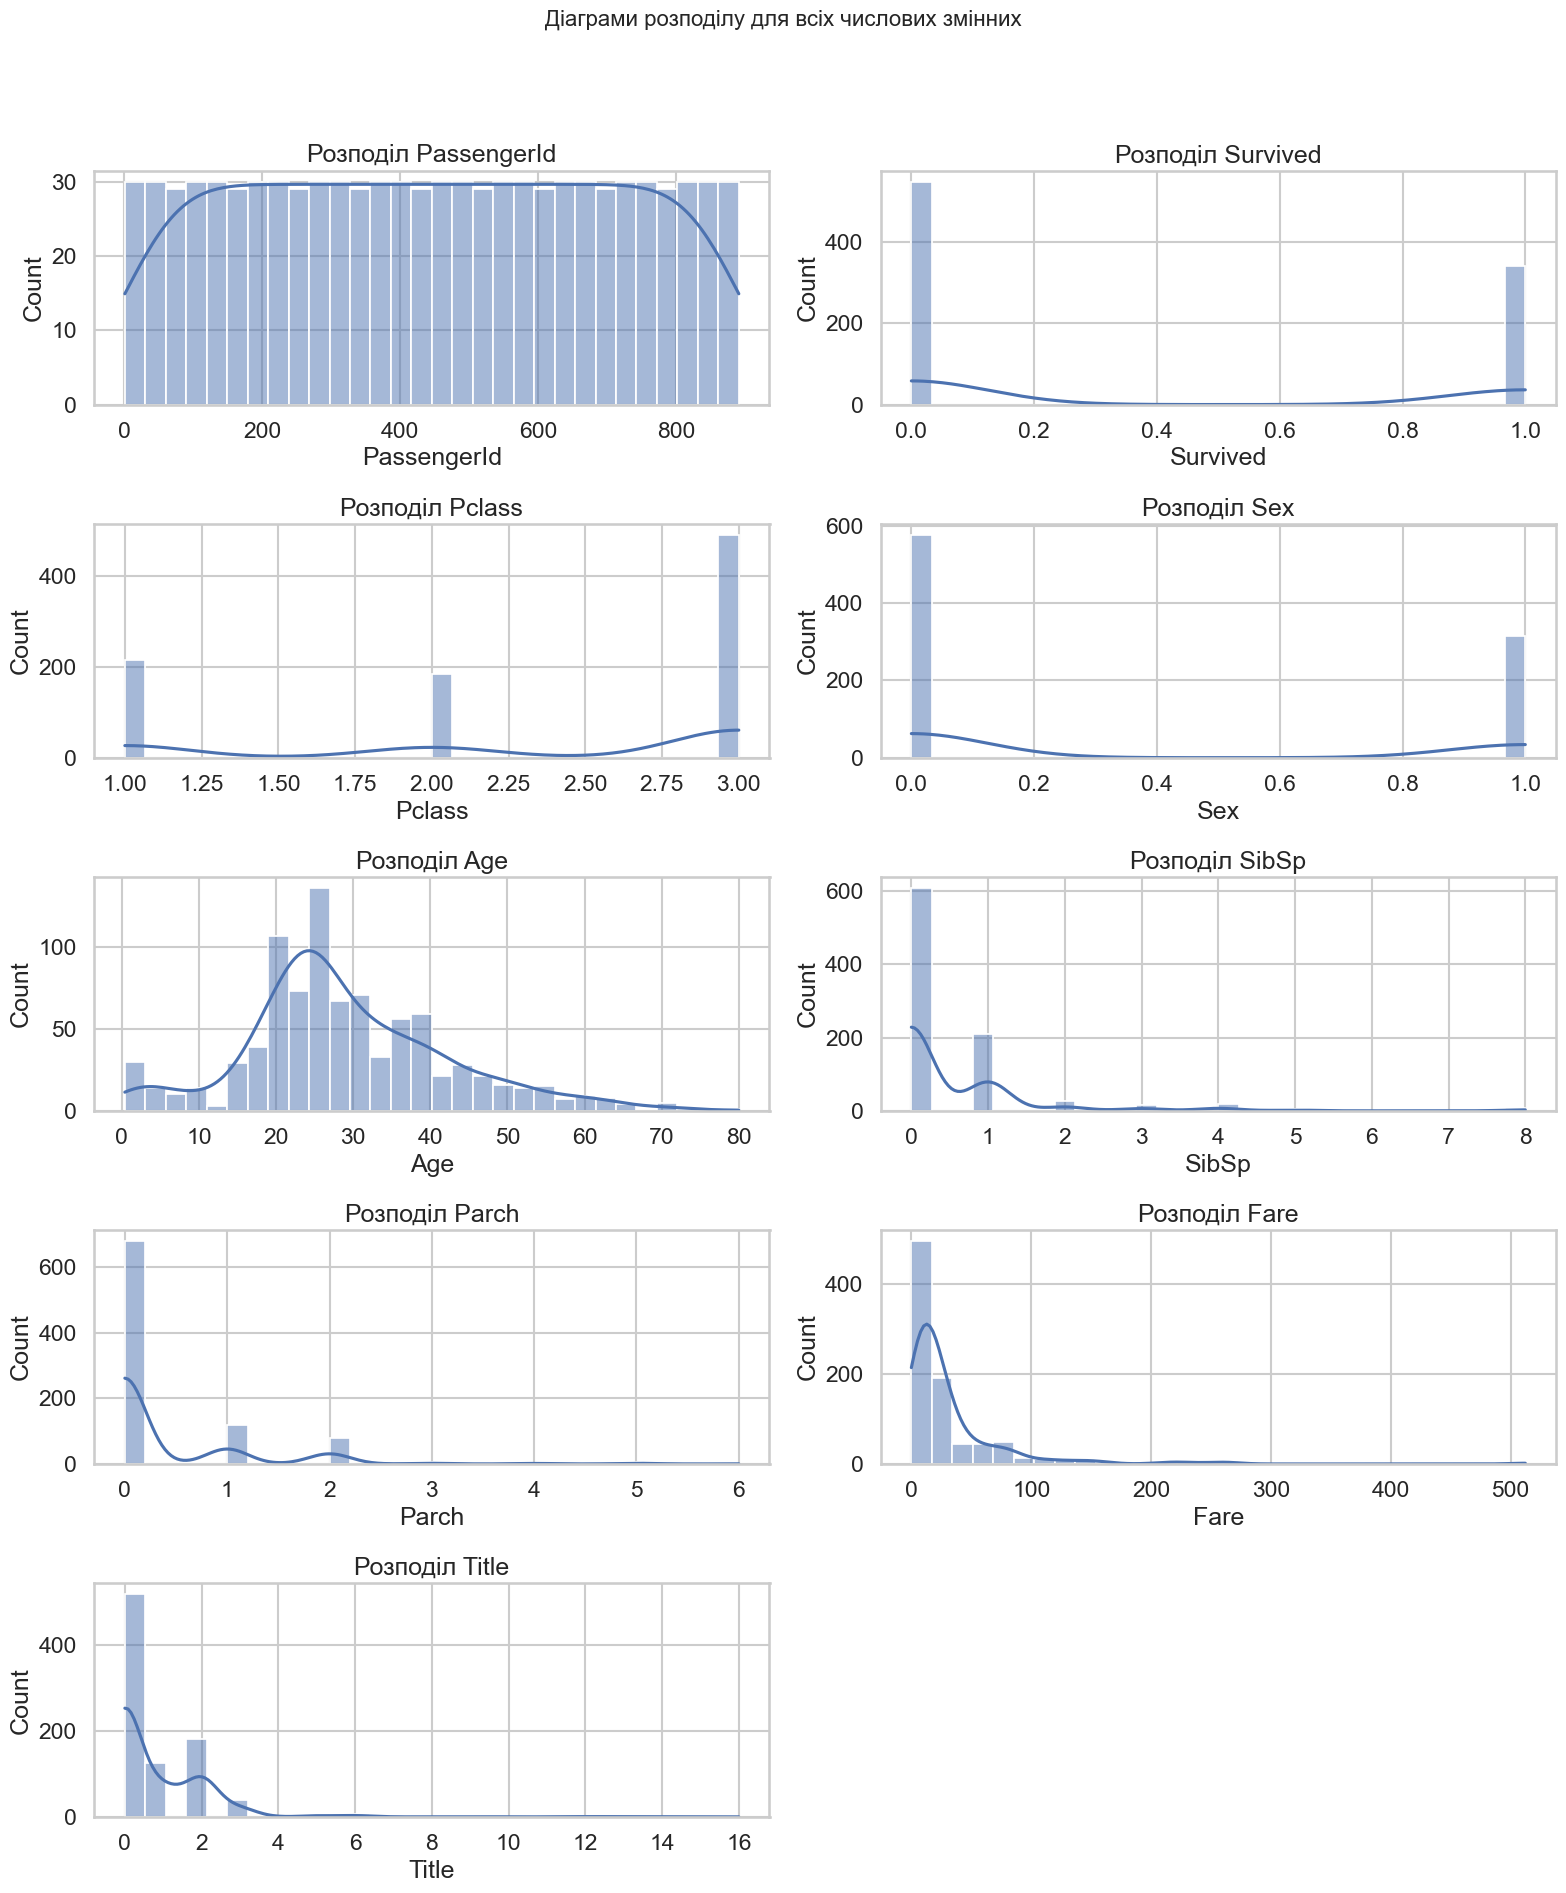

In [30]:
numeric_vars_full = df_filled_age.select_dtypes(include=['number']).columns

n_numeric_vars = len(numeric_vars_full)
n_rows = (n_numeric_vars + 1) // 2

fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(16, n_rows * 4))
fig.suptitle('Діаграми розподілу для всіх числових змінних', fontsize=16)

for i, var in enumerate(numeric_vars_full):
    row = i // 2
    col = i % 2
    sns.histplot(df_filled_age[var], kde=True, ax=axes[row, col], bins=30)
    axes[row, col].set_title(f'Розподіл {var}')

if n_numeric_vars % 2 != 0:
    fig.delaxes(axes[n_rows-1][1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Ваші висновки:

Діаграми розподілу для всіх числових змінних
Аналіз розподілів числових змінних показав різноманітність характеристик пасажирів, включаючи їхній вік, вартість квитків та кількість супутників, що має значення для розуміння динаміки виживання.


##Співвіднонешшя між всіма числовими змінними
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

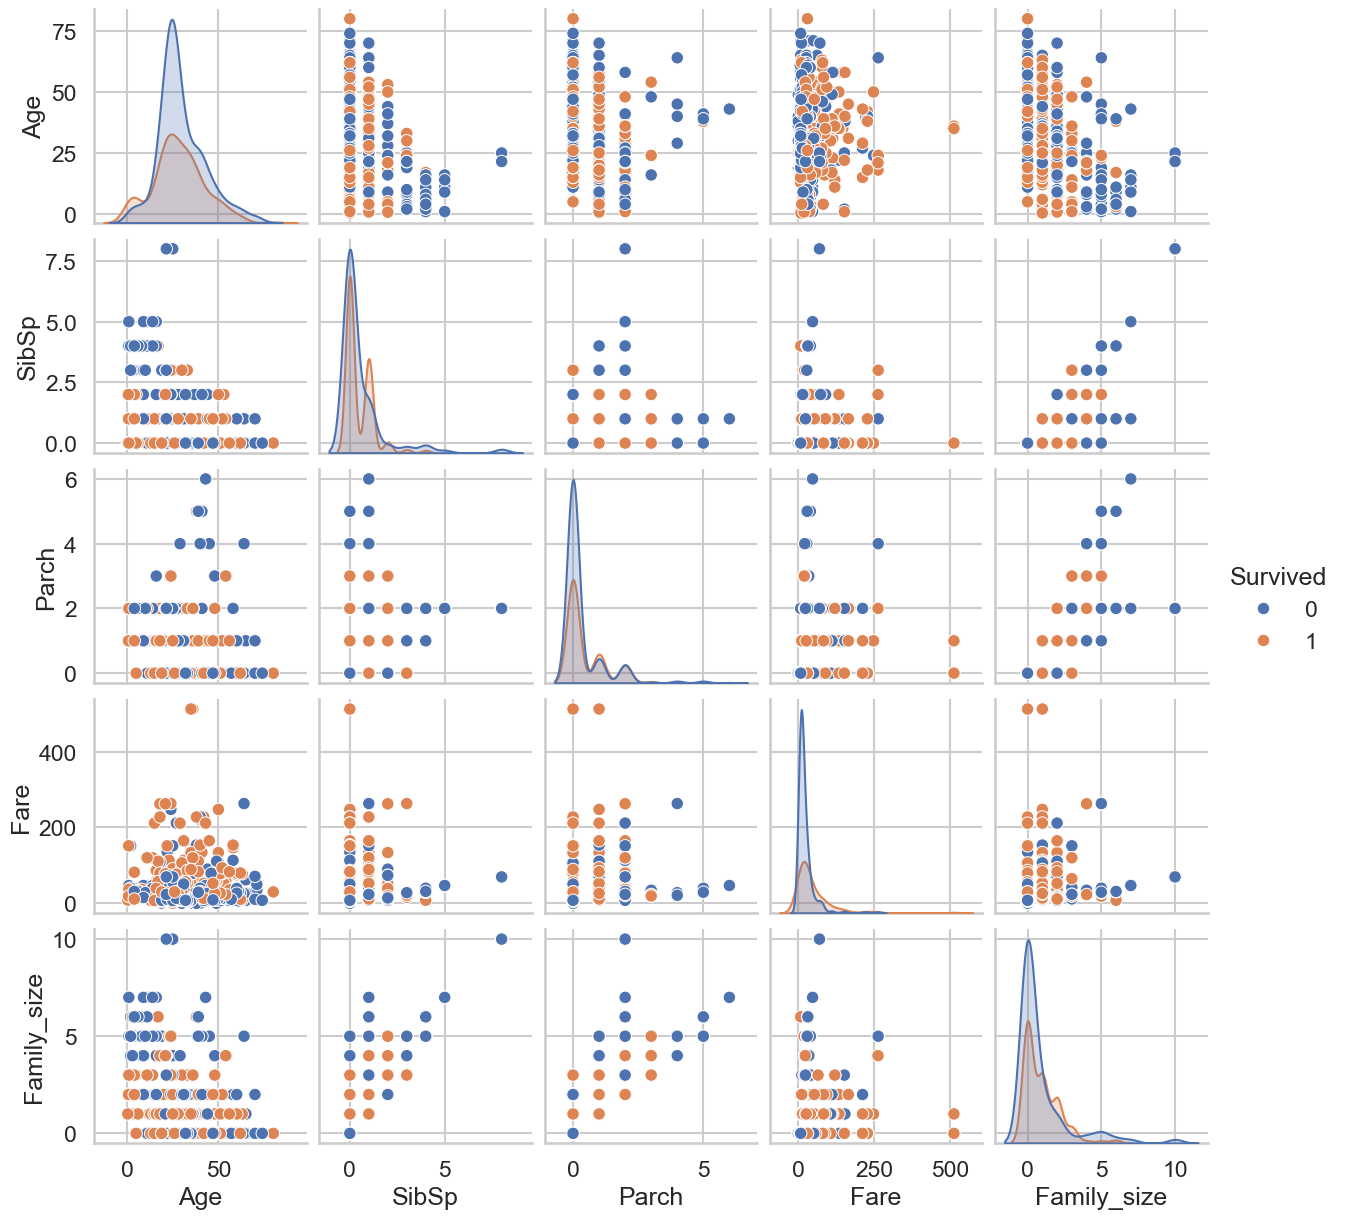

In [41]:
sns.pairplot(df_reduced[numerical_variables + ['Survived']], hue='Survived')
plt.show()

Ваші висновки:

Аналіз співвідношення між змінними
Аналіз співвідношення між змінними через графіки співвідношення надав глибше розуміння взаємодії між різними характеристиками пасажирів. Зокрема, цей аналіз дозволив виявити викиди, потенційні аномалії та інсайти, які можуть бути неочевидні при одновимірному аналізі. Виявлення цих взаємозв'язків є важливим для розробки ефективних моделей машинного навчання та для підкріплення або спростування гіпотез про фактори, що впливають на виживання. Особливо цінним є виявлення тенденцій та патернів, які можуть вказувати на складні соціально-економічні взаємозв'язки або впливати на стратегії виживання в різних ситуаціях.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.